In [6]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/captionTrain.csv')
train.head()

,sentence
0,사람이 다가오고 있습니다
1,사람과 자전거가 다가오고 있습니다
2,자전거와 사람이 다가오고 있습니다
3,사람과 자전거가 있습니다
4,자전거와 사람이 있습니다


음절 단위

In [19]:
vocab = set()
for i, row in train.iterrows(): # dataframe의 row별로 반복
    sentence = row['sentence']
    for token in sentence: #음절 단위 token 반복
        if token not in vocab:
            vocab.add(token) # token set에 없다면 추가
        else:
            continue
vocab.add('<EOS>') # 문장 마지막을  <EOS>로 끝낼거라 <End of Sequence> token 추가
print ('고유 문자수 {}개'.format(len(vocab)))

고유 문자수 58개


In [20]:
vocab

{' ',
 ',',
 '<EOS>',
 '가',
 '갑',
 '개',
 '거',
 '걸',
 '고',
 '과',
 '놓',
 '늘',
 '니',
 '다',
 '대',
 '동',
 '되',
 '두',
 '둘',
 '드',
 '들',
 '라',
 '람',
 '러',
 '럿',
 '로',
 '를',
 '명',
 '바',
 '보',
 '볼',
 '사',
 '서',
 '설',
 '세',
 '수',
 '습',
 '앞',
 '어',
 '여',
 '오',
 '옵',
 '와',
 '워',
 '으',
 '의',
 '이',
 '있',
 '자',
 '전',
 '져',
 '차',
 '치',
 '킥',
 '타',
 '탄',
 '토',
 '폴'}

In [21]:
char2idx = {u:i for i, u in enumerate(vocab, start=1)}
char2idx

{' ': 13,
 ',': 57,
 '<EOS>': 14,
 '가': 3,
 '갑': 16,
 '개': 36,
 '거': 22,
 '걸': 58,
 '고': 40,
 '과': 41,
 '놓': 19,
 '늘': 45,
 '니': 35,
 '다': 2,
 '대': 48,
 '동': 30,
 '되': 10,
 '두': 43,
 '둘': 31,
 '드': 51,
 '들': 54,
 '라': 23,
 '람': 32,
 '러': 47,
 '럿': 55,
 '로': 8,
 '를': 9,
 '명': 18,
 '바': 15,
 '보': 52,
 '볼': 44,
 '사': 25,
 '서': 12,
 '설': 17,
 '세': 46,
 '수': 50,
 '습': 7,
 '앞': 27,
 '어': 11,
 '여': 34,
 '오': 33,
 '옵': 1,
 '와': 5,
 '워': 39,
 '으': 49,
 '의': 21,
 '이': 53,
 '있': 38,
 '자': 24,
 '전': 4,
 '져': 29,
 '차': 28,
 '치': 37,
 '킥': 6,
 '타': 26,
 '탄': 42,
 '토': 20,
 '폴': 56}

음절 단위

In [11]:
import numpy as np

sentence2vec_list = []
for i, row in train.iterrows():
    temp_arr = np.array([char2idx[c] for c in row['sentence']] + [char2idx['<EOS>']])
    sentence2vec_list.append(temp_arr)

In [12]:
sentence2vec_list

[array([25, 32, 53, 13,  2,  3, 33, 40, 13, 38,  7, 35,  2, 14]),
 array([25, 32, 41, 13, 24,  4, 22,  3, 13,  2,  3, 33, 40, 13, 38,  7, 35,
         2, 14]),
 array([24,  4, 22,  5, 13, 25, 32, 53, 13,  2,  3, 33, 40, 13, 38,  7, 35,
         2, 14]),
 array([25, 32, 41, 13, 24,  4, 22,  3, 13, 38,  7, 35,  2, 14]),
 array([24,  4, 22,  5, 13, 25, 32, 53, 13, 38,  7, 35,  2, 14]),
 array([24,  4, 22, 13, 34, 47, 13, 48,  5, 13, 25, 32, 53, 13, 38,  7, 35,
         2, 14]),
 array([25, 32, 53, 13, 34, 55, 13, 38,  7, 35,  2, 14]),
 array([25, 32, 13, 34, 47, 13, 18, 41, 13, 24,  4, 22, 13, 34, 47, 13, 48,
         3, 13, 38,  7, 35,  2, 14]),
 array([25, 32, 53, 13, 27, 49,  8, 13, 58, 11,  3, 40, 13, 38,  7, 35,  2,
        14]),
 array([ 4, 30,  6, 52, 51,  9, 13, 42, 13, 25, 32, 53, 13,  2,  3, 33, 40,
        13, 38,  7, 35,  2, 14]),
 array([ 4, 30,  6, 52, 51,  9, 13, 42, 13, 25, 32, 41, 13, 34, 47, 13, 18,
        21, 13, 25, 32, 53, 13, 38,  7, 35,  2, 14]),
 array([ 4, 30,  6

In [9]:
# vector 복원
for num in sentence2vec_list[0]:
  for c, id in char2idx.items():
    if id == num:
      print(c, end='')

사람이 다가오고 있습니다<EOS>

In [22]:
import numpy as np

sentence2vec = np.array(sentence2vec_list, dtype=object)

sequence_list = []
for vec in sentence2vec:
    for i in range(len(vec)):
        sequence = vec[:i+1]
        sequence_list.append(sequence)

In [23]:
sequence_list[:15]

[array([25]),
 array([25, 32]),
 array([25, 32, 53]),
 array([25, 32, 53, 13]),
 array([25, 32, 53, 13,  2]),
 array([25, 32, 53, 13,  2,  3]),
 array([25, 32, 53, 13,  2,  3, 33]),
 array([25, 32, 53, 13,  2,  3, 33, 40]),
 array([25, 32, 53, 13,  2,  3, 33, 40, 13]),
 array([25, 32, 53, 13,  2,  3, 33, 40, 13, 38]),
 array([25, 32, 53, 13,  2,  3, 33, 40, 13, 38,  7]),
 array([25, 32, 53, 13,  2,  3, 33, 40, 13, 38,  7, 35]),
 array([25, 32, 53, 13,  2,  3, 33, 40, 13, 38,  7, 35,  2]),
 array([25, 32, 53, 13,  2,  3, 33, 40, 13, 38,  7, 35,  2, 14]),
 array([25])]

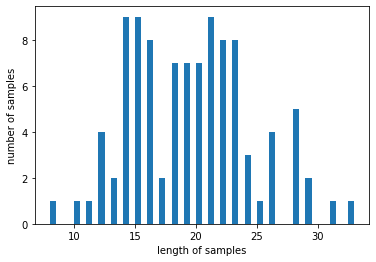

In [12]:
import matplotlib.pyplot as plt

plt.hist([len(s) for s in sentence2vec_list], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [15]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = max(map(len, sentence2vec_list))
sequences = pad_sequences(sequence_list, maxlen=max_len, padding='pre')

In [14]:
sequences[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 22],
      dtype=int32)

In [15]:
np.random.shuffle(sequences)
split_num = int(len(sequences) * 0.8)

X = sequences[:split_num,:-1]
y = sequences[:split_num,-1]

X_test = sequences[split_num:,:-1]
y_test = sequences[split_num:,-1]

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GRU
from keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping() 
# 조기종료 : epoch를 길게 돌리지 않고, 이전 epoch보다 accuracy가 낮을 경우 종료

model = Sequential()
model.add(Embedding(5000, 300, input_length=max_len-1, mask_zero=True)) 
# 레이블을 분리하였으므로 이제 X의 길이는 max_len-1
model.add(GRU(128))
model.add(Dense(5000, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# sparse_categorical_crossentropy
# categorical_crossentropy와 다른점은 정답 integer값을 원-핫벡터로 만들어주지 않아도 된다는점

model.summary()

# hist = model.fit(X, y,validation_split=0.1,shuffle=True, epochs=100, batch_size=30, verbose=1, callbacks=[early_stopping])
hist = model.fit(X, y,validation_split=0.1, shuffle=True, epochs=200, batch_size=30, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 300)           1500000   
                                                                 
 gru (GRU)                   (None, 128)               165120    
                                                                 
 dense (Dense)               (None, 5000)              645000    
                                                                 
Total params: 2,310,120
Trainable params: 2,310,120
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
47/47 [==============================] - 15s 194ms/step - loss: 6.3629 - accuracy: 0.2281 - val_loss: 3.8629 - val_accuracy: 0.1677
Epoch 2/200
47/47 [==============================] - 15s 314ms/step - loss: 3.6740 - accuracy: 0.1887 - val_loss: 3.6788 - val_accuracy: 0.1806
Epoch 3/200
47/47 [===

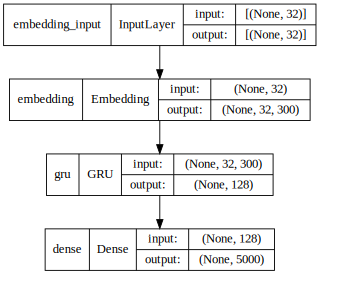

In [18]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True, dpi=65).create(prog='dot', format='svg'))

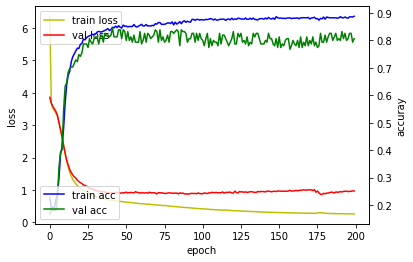

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()


In [20]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=32)

print('')
print('loss : ' + str(loss_and_metrics[0]))
print('accuray : ' + str(loss_and_metrics[1]))

13/13 [==============================] - 0s 25ms/step - loss: 0.9439 - accuracy: 0.7938

loss : 0.9439195394515991
accuray : 0.7938144207000732


In [23]:
current_word = '사람'
init_word = current_word # 처음 들어온 단어도 마지막에 같이 출력하기위해 저장
sentence = ''
n = 35
for _ in range(n): # n번 반복
    encoded = [char2idx[token] for token in current_word]#t.texts_to_sequences([current_word])[0] 
    # 현재 단어에 대한 정수 인코딩
    
    encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre') 
    # 데이터에 대한 패딩
    
    result = np.argmax(model.predict(encoded), axis=-1) 
	
    # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
    for word, index in char2idx.items(): 
        if index == result: # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
            break # 해당 단어가 예측 단어이므로 break
    current_word = current_word + word # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
    sentence = sentence + word # 예측 단어를 문장에 저장
    if word == '<EOS>':
        break
# for문이므로 이 행동을 다시 반복
sentence = init_word + sentence
sentence.replace('<EOS>',"")

'사람이 다가오고 있습니다'

In [24]:
from keras.models import load_model
model.save('senten_generating_model.h5')

모델 불러와 사용해보기

In [3]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax

from keras.models import load_model
model = load_model('/content/senten_generating_model.h5')

In [16]:
current_word = '사람'
init_word = current_word # 처음 들어온 단어도 마지막에 같이 출력하기위해 저장
sentence = ''
n = 35
for _ in range(n): # n번 반복
    encoded = [char2idx[token] for token in current_word]#t.texts_to_sequences([current_word])[0] 
    # 현재 단어에 대한 정수 인코딩
    
    encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre') 
    # 데이터에 대한 패딩
    
    result = np.argmax(model.predict(encoded), axis=-1) 
	
    # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
    for word, index in char2idx.items(): 
        if index == result: # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
            break # 해당 단어가 예측 단어이므로 break
    current_word = current_word + word # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
    sentence = sentence + word # 예측 단어를 문장에 저장
    if word == '<EOS>':
        break;
# for문이므로 이 행동을 다시 반복
sentence = init_word + sentence
sentence.replace('<EOS>',"")

'사람동으킥 워폴,어,어,거토자,앞둘,걸탄되놓치놓치져되놓치놓치져되놓치'

In [17]:
current_word = '사람이'
init_word = current_word # 처음 들어온 단어도 마지막에 같이 출력하기위해 저장
sentence = ''
n = 35
for _ in range(n): # n번 반복
    encoded = [char2idx[token] for token in current_word]#t.texts_to_sequences([current_word])[0] 
    # 현재 단어에 대한 정수 인코딩
    
    encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre') 
    # 데이터에 대한 패딩
    
    result = np.argmax(model.predict(encoded), axis=-1) 
	
    # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
    for word, index in char2idx.items(): 
        if index == result: # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
            break # 해당 단어가 예측 단어이므로 break
    current_word = current_word + word # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
    sentence = sentence + word # 예측 단어를 문장에 저장
    if word == '<EOS>':
        break;
# for문이므로 이 행동을 다시 반복
sentence = init_word + sentence
sentence.replace('<EOS>',"")

'사람이동으킥킥킥  워킥킥 워킥있동다가,거토자,걸탄되놓치놓치갑고개자,걸'